In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white
from scipy.stats import jarque_bera, shapiro
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [144]:
# Fetch historical stock prices for the chosen asset
ticker = 'TMUS'  # Replace with the desired ticker
start_date = '2019-01-01'
end_date = '2023-11-01'
stock_prices = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
returns = 100 * stock_prices.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [123]:
returns.head()

Date
2019-01-03   -0.367768
2019-01-04    3.798833
2019-01-07    1.407623
2019-01-08   -0.978968
2019-01-09   -0.073772
Name: Adj Close, dtype: float64

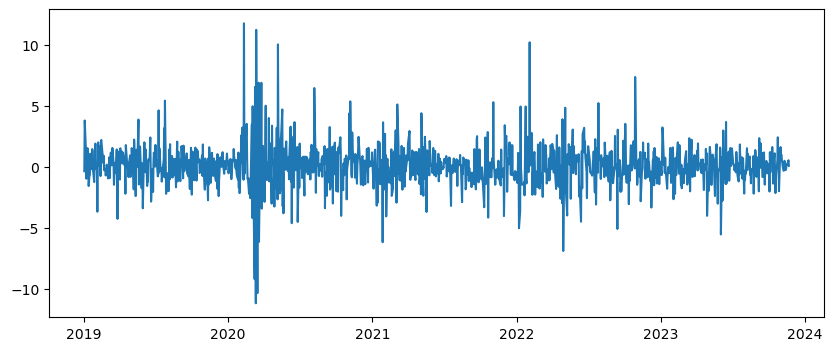

In [124]:
plt.figure(figsize=(10,4))
plt.plot(returns)

In [125]:
# 1. Stationarity Test (Augmented Dickey-Fuller)
adf_result = adfuller(returns)
print(f'ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}')
if adf_result[1] > 0.05:
    print('Fail to reject the null hypothesis. Time series is likely non-stationary.')
else:
    print('Reject the null hypothesis. Time series is likely stationary.')

ADF Statistic: -11.363974349820534, p-value: 9.324370977938789e-21
Reject the null hypothesis. Time series is likely stationary.


C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


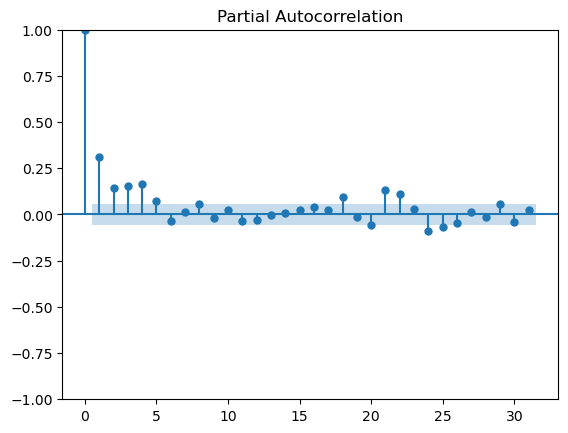

In [126]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(returns**2)
plt.show()

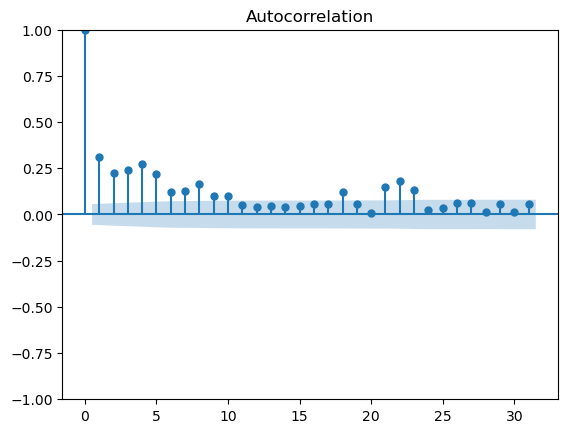

In [127]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(returns**2)
plt.show()

In [128]:
amodel = arch_model(returns, vol='Garch', p=1, q=0)
aresults = amodel.fit()
aresults.summary

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3534.617344652294
Iteration:      2,   Func. Count:     13,   Neg. LLF: 6103.667168120295
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2394.116960447466
Iteration:      4,   Func. Count:     24,   Neg. LLF: 578278.1611475565
Iteration:      5,   Func. Count:     29,   Neg. LLF: 2393.2220766918517
Iteration:      6,   Func. Count:     33,   Neg. LLF: 2393.2185966088546
Iteration:      7,   Func. Count:     37,   Neg. LLF: 2393.2185591092543
Iteration:      8,   Func. Count:     40,   Neg. LLF: 2393.2185591093084
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2393.2185591092543
            Iterations: 8
            Function evaluations: 40
            Gradient evaluations: 8


<bound method ARCHModelResult.summary of                       Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2393.22
Distribution:                  Normal   AIC:                           4792.44
Method:            Maximum Likelihood   BIC:                           4807.78
                                        No. Observations:                 1231
Date:                Thu, Nov 23 2023   Df Residuals:                     1230
Time:                        01:55:35   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.083

In [129]:
gmodel1 = arch_model(returns, vol='Garch', p=1, q=1)
gresults1 = gmodel1.fit()
gresults1.summary

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7061.848840709574
Iteration:      2,   Func. Count:     16,   Neg. LLF: 28553.6665361383
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3511.018321131744
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2715.764575198268
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2322.643415094663
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2321.808453126092
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2321.772654964797
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2321.769639001489
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2321.7694689593436
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2321.769467051405
Iteration:     11,   Func. Count:     68,   Neg. LLF: 2321.7694670514556
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2321.769467051405
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 1

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2321.77
Distribution:                  Normal   AIC:                           4651.54
Method:            Maximum Likelihood   BIC:                           4672.00
                                        No. Observations:                 1231
Date:                Thu, Nov 23 2023   Df Residuals:                     1230
Time:                        01:55:36   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.057

In [130]:
gmodel2 = arch_model(returns, vol='Garch', p=2, q=1)
gresults2 = gmodel2.fit()
gresults2.summary

Iteration:      1,   Func. Count:      7,   Neg. LLF: 7104.034388008906
Iteration:      2,   Func. Count:     17,   Neg. LLF: 12999828603.855896
Iteration:      3,   Func. Count:     26,   Neg. LLF: 337087666.01183856
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2329.891026412018
Iteration:      5,   Func. Count:     40,   Neg. LLF: 2322.556033462057
Iteration:      6,   Func. Count:     47,   Neg. LLF: 2436.0374089497554
Iteration:      7,   Func. Count:     54,   Neg. LLF: 2324.985109611597
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2318.113461975499
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2318.108861749267
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2318.1083331067093
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2318.1082325020516
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2318.10823199612
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2318.10823199612
            Iterations: 1

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2318.11
Distribution:                  Normal   AIC:                           4646.22
Method:            Maximum Likelihood   BIC:                           4671.79
                                        No. Observations:                 1231
Date:                Thu, Nov 23 2023   Df Residuals:                     1230
Time:                        01:55:36   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.046

In [131]:
gmodel3 = arch_model(returns, vol='Garch', p=1, q=2)
gresults3 = gmodel3.fit()
gresults3.summary

Iteration:      1,   Func. Count:      7,   Neg. LLF: 7038.028647538375
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2695972526.9473195
Iteration:      3,   Func. Count:     24,   Neg. LLF: 408269375.5301783
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2352.9741754824286
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2617.5837009475695
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2358.6119081813977
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2322.4979175153885
Iteration:      8,   Func. Count:     58,   Neg. LLF: 2322.030470984295
Iteration:      9,   Func. Count:     64,   Neg. LLF: 2321.8074578377827
Iteration:     10,   Func. Count:     70,   Neg. LLF: 2321.794018108103
Iteration:     11,   Func. Count:     76,   Neg. LLF: 2321.7718703748533
Iteration:     12,   Func. Count:     82,   Neg. LLF: 2321.77348707324
Iteration:     13,   Func. Count:     89,   Neg. LLF: 2321.7694692635964
Iteration:     14,   Func. Count:     95,   Neg. LLF: 232

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2321.77
Distribution:                  Normal   AIC:                           4653.54
Method:            Maximum Likelihood   BIC:                           4679.12
                                        No. Observations:                 1231
Date:                Thu, Nov 23 2023   Df Residuals:                     1230
Time:                        01:55:37   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.057

In [132]:
gmodel4 = arch_model(returns, vol='Garch', p=3, q=1)
gresults4 = gmodel4.fit()
gresults4.summary

Iteration:      1,   Func. Count:      8,   Neg. LLF: 5748.1348497175695
Iteration:      2,   Func. Count:     18,   Neg. LLF: 9336834062.910387
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2573.0731000048168
Iteration:      4,   Func. Count:     37,   Neg. LLF: 2335.8382496107406
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2353.2699803407636
Iteration:      6,   Func. Count:     53,   Neg. LLF: 2322.036621329115
Iteration:      7,   Func. Count:     61,   Neg. LLF: 2330.6469063388677
Iteration:      8,   Func. Count:     69,   Neg. LLF: 2318.2947799786225
Iteration:      9,   Func. Count:     76,   Neg. LLF: 2318.12728625632
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2318.1086773300776
Iteration:     11,   Func. Count:     90,   Neg. LLF: 2318.1082834460467
Iteration:     12,   Func. Count:     97,   Neg. LLF: 2318.1082347290117
Iteration:     13,   Func. Count:    104,   Neg. LLF: 2318.108232968604
Iteration:     14,   Func. Count:    111,   Neg. LLF: 23

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2318.11
Distribution:                  Normal   AIC:                           4648.22
Method:            Maximum Likelihood   BIC:                           4678.91
                                        No. Observations:                 1231
Date:                Thu, Nov 23 2023   Df Residuals:                     1230
Time:                        01:55:37   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.046

In [133]:
gmodel5 = arch_model(returns, vol='Garch', p=2, q=2)
gresults5 = gmodel5.fit()
gresults5.summary

Iteration:      1,   Func. Count:      8,   Neg. LLF: 5385.512352215059
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1007984.6629531228
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2457.270775519456
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2330.2733347641283
Iteration:      5,   Func. Count:     44,   Neg. LLF: 2336.7331116596697
Iteration:      6,   Func. Count:     52,   Neg. LLF: 2320.815399672964
Iteration:      7,   Func. Count:     60,   Neg. LLF: 2370.6770696337894
Iteration:      8,   Func. Count:     68,   Neg. LLF: 2317.5911973721436
Iteration:      9,   Func. Count:     76,   Neg. LLF: 2317.426477471522
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2317.425506776392
Iteration:     11,   Func. Count:     90,   Neg. LLF: 2317.4255028687953
Iteration:     12,   Func. Count:     96,   Neg. LLF: 2317.4255028683992
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2317.4255028687953
            Iteratio

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2317.43
Distribution:                  Normal   AIC:                           4646.85
Method:            Maximum Likelihood   BIC:                           4677.54
                                        No. Observations:                 1231
Date:                Thu, Nov 23 2023   Df Residuals:                     1230
Time:                        01:55:37   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.049

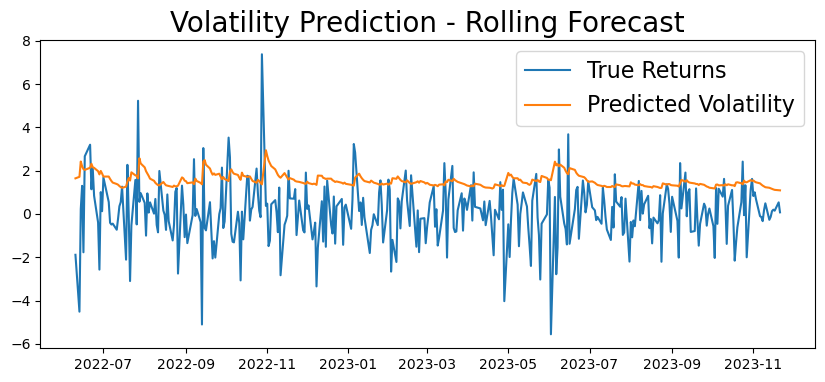

In [134]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

Text(0.5, 1.0, 'Volatility Prediction - Rolling Forecast')

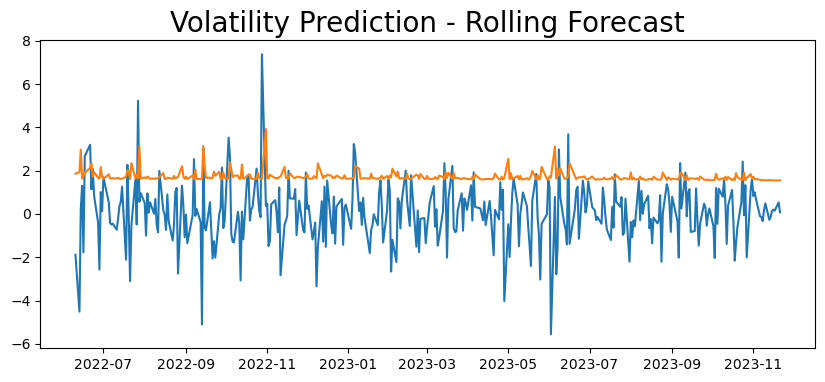

In [135]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)

Text(0.5, 1.0, 'Volatility Prediction - Rolling Forecast')

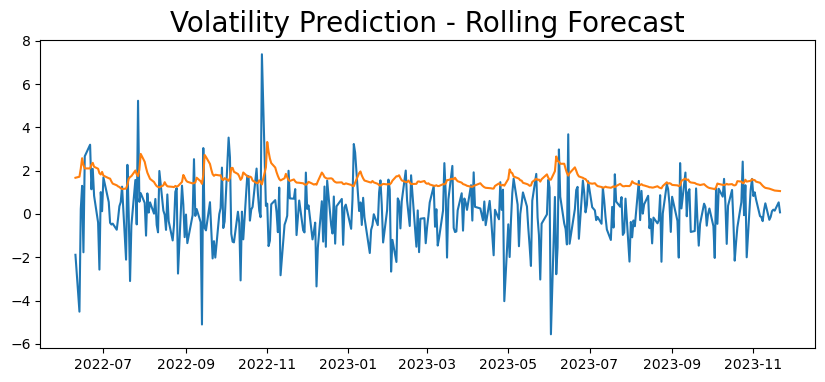

In [136]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

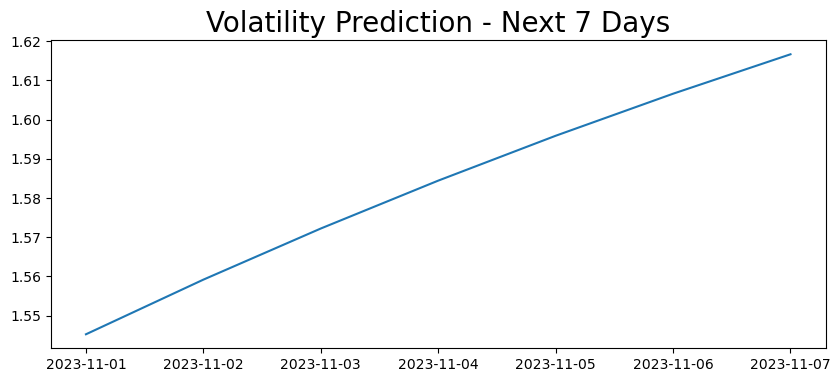

In [146]:
from datetime import datetime, timedelta
train = returns
model = arch_model(train, p=1, q=1)
model_fit = model.fit(disp='off')
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

In [163]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'returns' is your DataFrame with the returns data
# Let's create a DataFrame with squared returns
squared_returns = returns**2

# Generate lagged variables
lags = 5
for i in range(1, lags+1):
    squared_returns[f'returns_lag{i}'] = squared_returns.iloc[:, 0].shift(i)

# Drop rows with NaN values
squared_returns = squared_returns.dropna()

# Define dependent variable
y = squared_returns.iloc[:, 0]  # Assuming the first column is the squared returns data

# Define independent variables (lagged squared returns) and add a constant column
X = sm.add_constant(squared_returns[[f'returns_lag{i}' for i in range(1, lags+1)]])

# Fit OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Get residuals
residuals = results.resid

# Perform Engle’s Lagrange multiplier test for ARCH effects
lm_test_statistic, lm_p_value, _, _ = sm.stats.diagnostic.het_arch(residuals)
print(f"Lagrange Multiplier Test Statistic: {lm_test_statistic}")
print(f"P-value: {lm_p_value}")


IndexingError: Too many indexers

In [ ]:
cvar_rjpy_stat = {}
for date in data_out_of_the_sample.index:
res = am.fit(last_obs = date, disp='off')
forecasts = res.forecast(horizon=1)
forecasts_res = forecasts.variance.dropna()
cvar_rjpy_stat[date] = forecasts_res.iloc[1]
cvar_rjpy_stat = pd.DataFrame(cvar_rjpy_stat).T

In [ ]:
res = am.fit(last_obs = '2016-08-03', disp='off')
forecasts = res.forecast(horizon=len(data_out_of_the_sample))
forecasts_res = forecasts.variance.dropna()
cvar_rjpy_dyn = pd.DataFrame(data = forecasts_res.iloc[1].values,\
columns=['dynamic forecasting'],\
index=data_out_of_the_sample.index)

In [ ]:
plt.figure(1)
plt.plot(cvar_rjpy_stat, label='static forecast')
plt.plot(cvar_rjpy_dyn, label='dynamic forecast')
plt.xlabel('Date')
plt.ylabel('Forecasts')
plt.legend()
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import yfinance as yf

# Fetch historical stock prices for the chosen asset
ticker = 'TMUS'  # Replace with the desired ticker
start_date = '2019-01-01'
end_date = '2023-11-01'
stock_prices = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
returns = 100 * stock_prices.pct_change().dropna()

# Sampling
data_in_the_sample = returns.loc[:'2016-08-02']
data_out_of_the_sample = returns.loc['2016-08-03':]

# Print some information for debugging
print("Number of observations in data_out_of_the_sample:", len(data_out_of_the_sample))

# Initialize GARCH model
am = arch_model(data_in_the_sample, vol='Garch')

# Static forecasting
cvar_tmus_stat = {}
for date in data_out_of_the_sample.index:
    print(f"Fitting model for date: {date}")
    res = am.fit(last_obs=date, disp='off')
    forecasts = res.forecast(horizon=1)
    forecasts_res = forecasts.variance.dropna()
    cvar_tmus_stat[date] = forecasts_res.iloc[1]

# Convert static forecasts to DataFrame
cvar_tmus_stat = pd.DataFrame(cvar_tmus_stat).T

# Plot static forecasts
plt.figure(figsize=(10, 6))
plt.plot(cvar_tmus_stat, label='Static Forecast')
plt.xlabel('Date')
plt.ylabel('Conditional Variance')
plt.legend()
plt.title('Static Forecasting for TMUS')
plt.show()


[*********************100%%**********************]  1 of 1 completed
Number of observations in data_out_of_the_sample: 1216
Fitting model for date: 2019-01-03 00:00:00


ValueError: first_obs and last_obs produce in an empty array.